First few rows of the dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

Summary statistics of the dataset:
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

Missing values in each column:
date            0
meantem

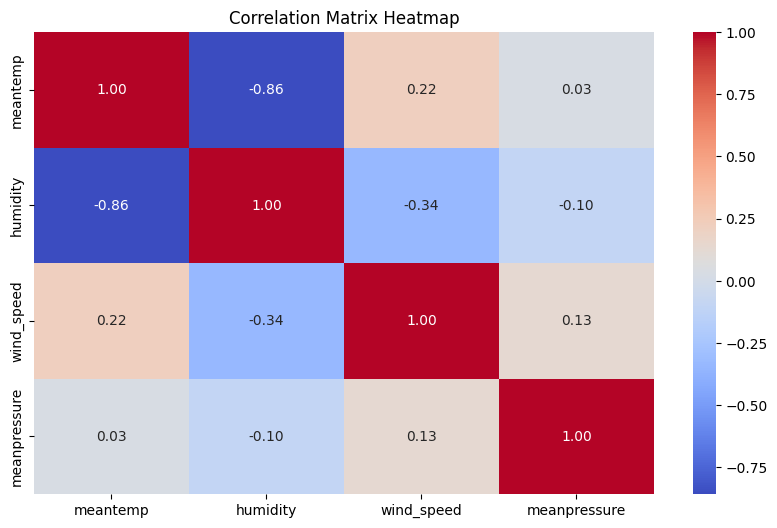


Average temperature by year saved to 'avg_temp_by_year.csv'.
Summary statistics saved to 'summary_statistics.csv'.
Correlation matrix saved to 'correlation_matrix.csv'.
Cleaned dataset saved to 'cleaned_daily_delhi_climate.csv'.


In [1]:
#########################################################
# This file is part of the assignment for the course    #
# "AI Driven Data Analytics Course" by Skillarbitrage   #
# Assignment ID: 748544                                 #
# Submissions of weekly Exercises for                   #
# Exercises on AI-Powered Automation for Data Science   # 
# Using GitHub Copilot in VS Code                       #
# Week Duration: 15/06/2025 to 22/06/2025               #
#                                                       #
# Student Name : Arindam Mitra                          #
# Registration Code: STU20250430/14045                  #
# Email: arinmitra@gmail.com                            #
#                                                       #
# Tutor - Mohit Sharma (mohit.sharma@skillarbitra.ge),  #
# Host - Ritu Verma (ritu.varma@skillarbitra.ge)        #
#########################################################

# Exercise 2: Creating an Automated Climate Data Dashboard with Copilot
# Task 3: Data Exploration and Summary Statistics
""" 
○ Use df.describe() to get summary statistics of each column 
(temperature, humidity, etc.). Note the mean, min, and max values 
for each. For instance, observe the minimum and maximum temperatures 
recorded and the range of humidity and pressure.

Check for any missing values with df.isnull().sum(). If any of the 
four columns have missing data, decide how to handle it 
(for example, you could fi ll with a nearby value or drop those 
days if only a few). In a quick look, this dataset is often complete, 
but verify in case.

Calculate some overall statistics manually to include in your report:
■ The hottest temperature and coldest temperature in the whole period, 
and on which dates they occurred. Write out or print these results 
(e.g., “Max temp X°C on YYYY-MM-DD”).
■ The average temperature each year. This will show if there’s an upward 
trend year by year. One approach: extract the year from the date and 
group by it. Save this result (e.g., avg_temp_by_year) and take note 
of the values – did the average rise from 2013 to 2016/2017 or fluctuate?
■ Compute a correlation matrix for the variables (meantemp, humidity, 
wind_speed, meanpressure). This will quantify relationships 
(e.g., does temperature correlate negatively with humidity? Possibly, 
if hotter days tend to be less humid in this region, or maybe more 
humid – data will tell). Use df.corr() to get correlations. Then you can 
use Copilot to plot a heatmap
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
filepath = 'Processed_DailyDelhiClimate.csv'
df = pd.read_csv(filepath)
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Get summary statistics of each column
summary_stats = df.describe()
print("\nSummary statistics of the dataset:")
print(summary_stats)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values if any
if missing_values.any():
    print("\nHandling missing values...")
    # For simplicity, we will drop rows with any missing values
    df = df.dropna()
    print("Missing values handled by dropping rows with any missing data.")
else:
    print("No missing values found in the dataset.")

# Calculate overall statistics
# Hottest and coldest temperatures

max_temp = df['meantemp'].max()
max_temp_date = df.loc[df['meantemp'] == max_temp, 'date'].values[0]
min_temp = df['meantemp'].min()
min_temp_date = df.loc[df['meantemp'] == min_temp, 'date'].values[0]
print(f"\nHottest temperature: {max_temp}°C on {max_temp_date}")
print(f"Coldest temperature: {min_temp}°C on {min_temp_date}")

# Average temperature each year
df['year'] = pd.to_datetime(df['date']).dt.year
avg_temp_by_year = df.groupby('year')['meantemp'].mean().reset_index()
print("\nAverage temperature by year:")
print(avg_temp_by_year)
# Check for upward trend in average temperature
if avg_temp_by_year['meantemp'].is_monotonic_increasing:
    print("Average temperature shows an upward trend from 2013 to 2016/2017.")
else:
    print("Average temperature does not show a consistent upward trend from 2013 to 2016/2017.")

# Compute correlation matrix
correlation_matrix = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
# Save the average temperature by year to a CSV file
avg_temp_by_year.to_csv('avg_temp_by_year.csv', index=False)
print("\nAverage temperature by year saved to 'avg_temp_by_year.csv'.")
# Save the summary statistics to a CSV file
summary_stats.to_csv('summary_statistics.csv')
print("Summary statistics saved to 'summary_statistics.csv'.")
# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')
print("Correlation matrix saved to 'correlation_matrix.csv'.")
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_daily_delhi_climate.csv', index=False)
print("Cleaned dataset saved to 'cleaned_daily_delhi_climate.csv'.")

# End of the script
# This script performs data exploration and summary statistics on the 
# Daily Delhi Climate dataset.